# Die Fourierzerlegung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integr

# Defintionen
Hier definieren wir uns Sinus- und Kosinusfunktionen, die in das Intervall $[-\frac{L}{2},\frac{L}{2}]$> reinpassen

In [ ]:
#Definition von Funktionen
def cos(x,n=1,L=1):
    return np.cos(n*2.*np.pi/L*x)
def sin(x,n=1,L=1):
    return np.sin(n*2*np.pi/L*x)

Dann stellen wir einige dieser Funktionen graphisch dar:

In [ ]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1, adjustable='box', aspect=0.5)
ax2 = fig.add_subplot(1,2,2, adjustable='box', aspect=0.5)
#fig, (ax1,ax2) = plt.subplots(1,2)
x = np.linspace(-.5,.5,201)
#
ax1.set_title('Cosinus')
ax2.set_title('Sinus')
for n in np.arange(3):
    ax1.plot(x, cos(x,n,1))
    ax2.plot(x, sin(x,n,1))

# Testfunktionen
Wir definieren Testfunktionen, die wir in eine Fourierreihe zerlegen.

In [ ]:
# Mexican hat
def f(x):
    return -4.*x**2+16.*x**4
# Die Ableitung des Mexican hat
def fp(x):
    return 2.*x-4.*x**3
# Das Integral des Mexican hat
def F(x):
    return (x**3)/3. - (x**5)/5.

In [ ]:
%matplotlib inline
x = np.linspace(-.5,.5,201)
fig, ax = plt.subplots() # let us plot the data
ax.set_xlim([-.51, .51])
ax.set_ylim([-.26, .01])
ax.plot(x,f(x))
#ax.plot(x,y)

In [ ]:
x = np.linspace(-1,1,201)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(2,2)
ax[0,0].plot(x,x,label='y=x')
ax[0,0].set_ylabel('y')
ax[0,0].legend()
ax[0,0].grid()
ax[0,1].plot(x,x**2)
ax[1,0].plot(x,x**3)
ax[1,1].plot(x,x**4-x**2)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(x,x,label='y=x')
ax.set_ylabel('y')
ax.grid(ls='--')
ax.plot(x,x**2,label='y=x**2')
ax.plot(x,x**3,label='y=x**3')
ax.plot(x,x**4-x**2,label='y=x**4-x**2')
ax.legend()

# Integration
Integration mit numpy.trapz

In [ ]:
L = 1.
n = 1
m = 1
x = np.linspace(-1.,1.,201)
#plt.plot(x,cos(x,n,L))
#plt.plot(x,cos(x,m,L))
plt.plot(x,cos(x,n,L)*cos(x,m,L))
#np.trapz(cos(x,n,L))

In [ ]:
L=1
c = [np.trapz(cos(x,i,L)*f(x),dx=0.01) for i in np.arange(101)]

In [ ]:
s = [np.trapz(sin(x,i,L)*f(x),dx=0.01) for i in np.arange(11)]
y_cos = np.array([c[i]*cos(x,i,L) for i in np.arange(101)])
y_cos[0] = y_cos[0]/2

In [ ]:
%matplotlib notebook
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
#
#for i in np.arange(11):
#    ax.plot(y_cos[i])
ax1.plot(x,f(x))
ax2.plot(x,np.sum(y_cos,axis=0))
ax3.plot(c)

# Fourierreihe in 2D


In [60]:
x = np.linspace(-1.,1.,21)
y = np.linspace(-1.,1.,21)
X,Y = np.meshgrid(x,y)
A = np.exp(-(X**2+Y**2))  # Gaussfunktion auf dem 2D Intervall 

<IPython.core.display.Javascript object>


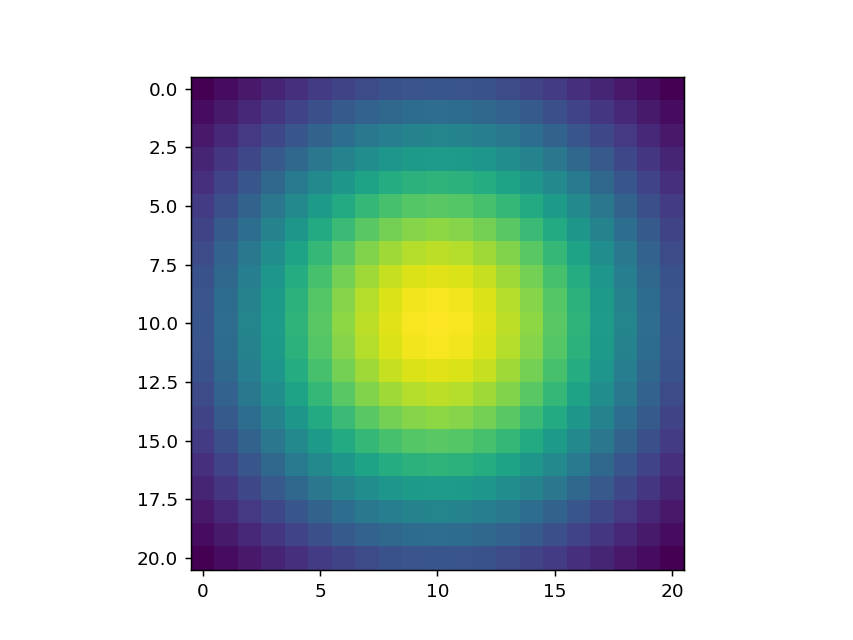

In [61]:
%matplotlib notebook
fig, ax = plt.subplots()
#
ax.imshow(A)

<IPython.core.display.Javascript object>


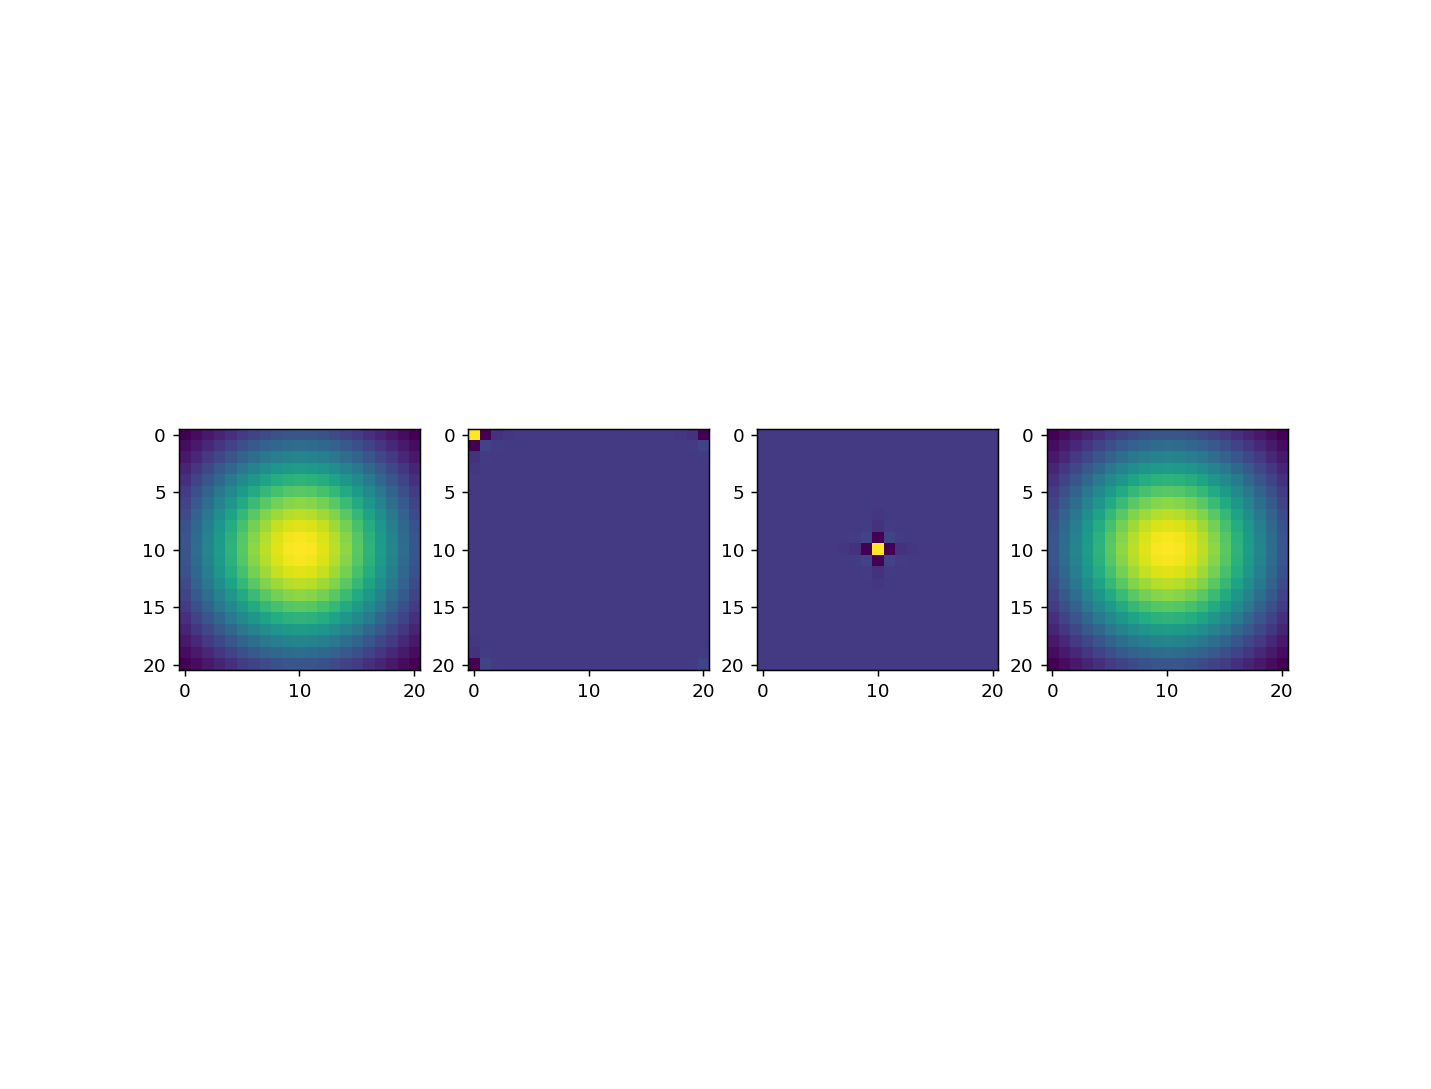

In [62]:
%matplotlib notebook
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
#
FTA = np.fft.fft2(A)
ax1.imshow(A.real)
ax2.imshow(FTA.real)
ax3.imshow(np.fft.fftshift(FTA).real)
ax4.imshow(np.fft.ifft2(FTA).real)

In [52]:
#a = np.mgrid[:5, :5][0]
a = np.ones((7,7))                 # Originalbild
a[2:5,2:5] = 0                     # Originalbild
ffta = np.fft.fft2(a)              # Fouriertransformation von a
fftashift = np.fft.fftshift(ffta)  # Shift der Achsen in die Mitte des Arrays
#
fftashift = np.sqrt(fftashift**2)
fftinva = np.fft.ifft2(ffta)
fftashiftishift = np.fft.ifftshift(fftashift)

<IPython.core.display.Javascript object>


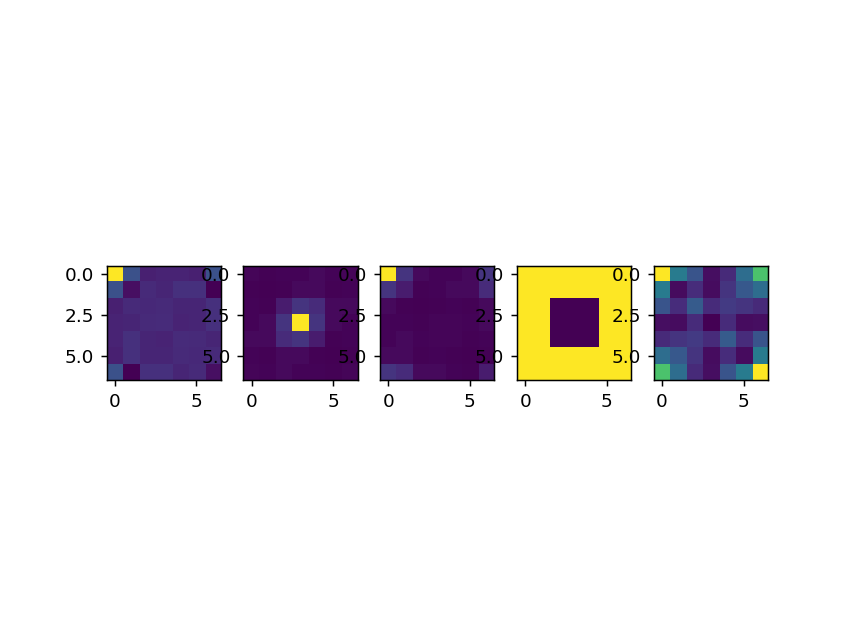

In [53]:
%matplotlib notebook
#
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
ax4.imshow(a)
ax1.imshow(ffta.real)
ax2.imshow(fftashift.real)
ax3.imshow(fftashiftishift.real)
ax5.imshow(np.fft.ifft2(fftashiftishift).real)

In [44]:
fftashift.real

array([[ 0.5794168 ,  0.27747907, -0.40096887, -0.5353438 ,  1.1234898 ,
        -0.40096887, -0.64310413],
       [ 0.27747907,  0.06853167,  0.27747907, -1.03803221,  1.1234898 ,
        -0.30797853, -0.40096887],
       [-0.40096887,  0.27747907, -3.14794847,  6.07337601, -5.04891734,
         1.1234898 ,  1.1234898 ],
       [-0.5353438 , -1.03803221,  6.07337601, 40.        ,  6.07337601,
        -1.03803221, -0.5353438 ],
       [ 1.1234898 ,  1.1234898 , -5.04891734,  6.07337601, -3.14794847,
         0.27747907, -0.40096887],
       [-0.40096887, -0.30797853,  1.1234898 , -1.03803221,  0.27747907,
         0.06853167,  0.27747907],
       [-0.64310413, -0.40096887,  1.1234898 , -0.5353438 , -0.40096887,
         0.27747907,  0.5794168 ]])

In [20]:
fftashift[3,3]

(40+0j)